## Лабороторная работа №1

### task 

1. Осуществить моделирование n = 100 300 1000 5000 реализаций БСВ с помощью мультипликативного конгруэнтного метода (МКМ) с параметрами a0, β, M = 2^31.
2. Проверить точность моделирования  датчика (п. 1 ) с помощью критерия согласия  chi-2-критерия Пирсона с уровнем значимости ε = 0.05.
3. Диаграмма рассеяния
4. Автокорреляционная функция
5. Доверительные интервалы для МО и дисперсии 

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

from lab1.graph import draw_autocorr,draw_cdf,draw_freq,draw_intervals,draw_scatter
from lab1.tests import get_frequency


MAX_K = k = 10 # для хи квадрат критерия 

N = 1000
M = 2.0 ** 31 -1
alpha0 = 56764
beta = 16807.0
C = 29

a = 0
b = 1
uniform_mean = (a+b)/2
uniform_var = (b - a )**2/12

## Генератор 

In [126]:
def mcg(alpha, beta, m, n,C):

    for i in range(n):
        alpha = (beta * alpha + C) % m
        yield alpha / m
        


## Выборка 150

In [127]:
N = 150
data = gen_numbers_n = list(mcg(alpha0, beta, M, N ,C))
sorted_seq = sorted(gen_numbers_n)



## Распределение  

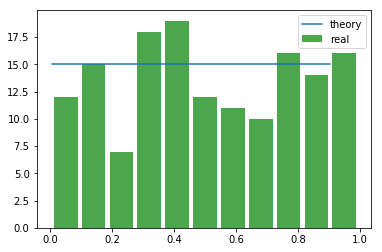

In [128]:
    
freq_real, segments = get_frequency(sorted_seq, k)
draw_freq(sorted_seq, [N/k] * (len(segments)),segments)
plt.show()

## Функция распределения

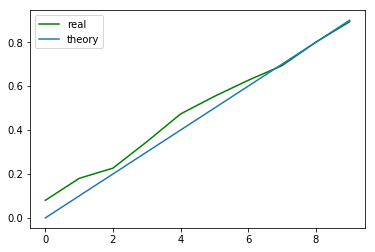

In [129]:
freq_real = [ x/N for x in freq_real]
cum_real = np.cumsum(freq_real)

def cum_ravn(x,a,b):
    return (x-a)/(b-a)

draw_cdf(cum_real,cum_ravn,np.arange(0, 1, 1/k))

## диаграмма рассеяния

y = (x_2i , x_2i+1)

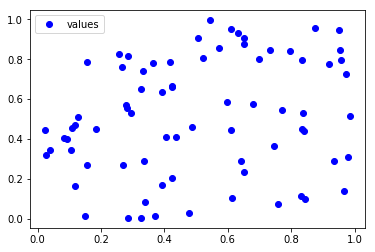

In [130]:
x_1 = [gen_numbers_n[i] for i in range(N) if i%2 == 1]
x_2 = [gen_numbers_n[i] for i in range(N) if i%2 == 0]
draw_scatter(x_1,x_2)


## автокорреляционная функция

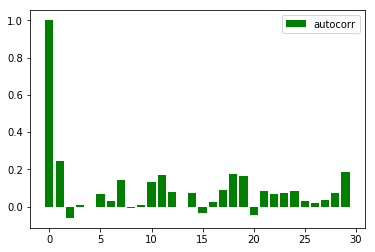

In [131]:
def autocorr(x, t=1):
    for i in range(0,t):
        y = x + [0]*i
        y = [ y[j+i] for j in range(len(x)) ]
        corr = np.corrcoef([x,y])
        yield corr[0][1]

corr = list(autocorr(gen_numbers_n,t=30))
draw_autocorr(corr)

## Выборки размера  300 500 1000 5000

распределение, автокорреляция, диагрмма рассеяния

распрделение для выборки размера 	  300


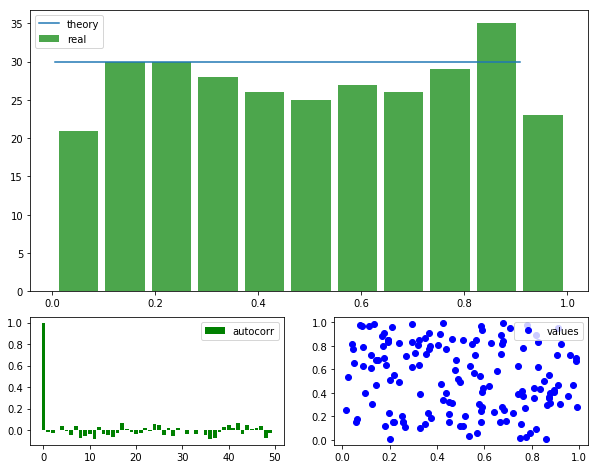

распрделение для выборки размера 	  500


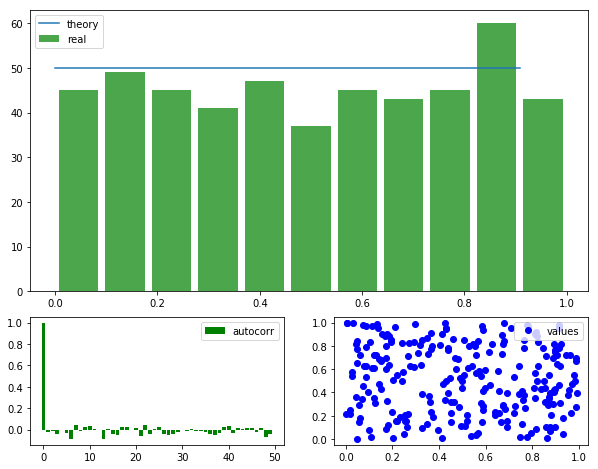

распрделение для выборки размера 	  1000


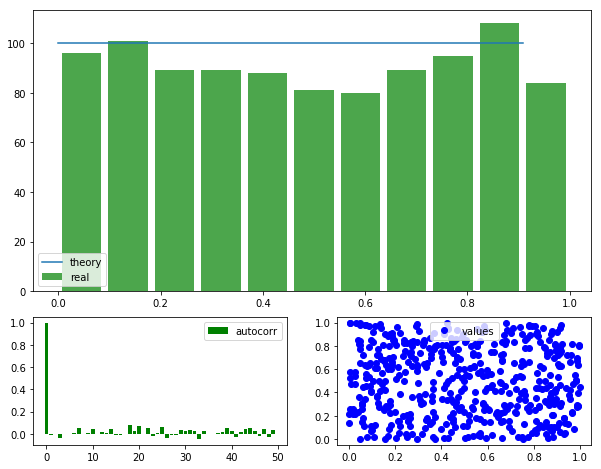

распрделение для выборки размера 	  5000


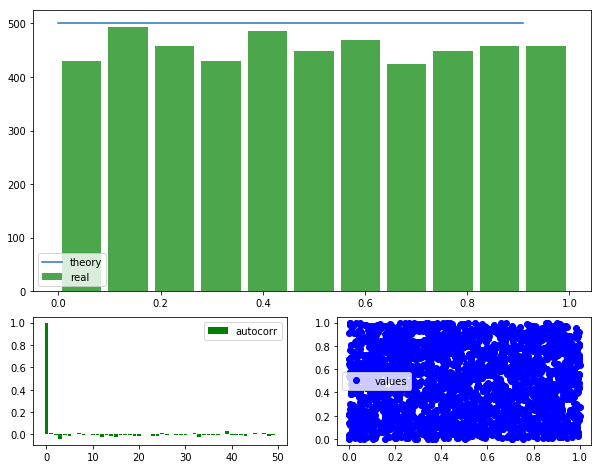

In [132]:
from lab1.utils import generate_results_lab1

generate_results_lab1(300,k)
generate_results_lab1(500,k)
generate_results_lab1(1000,k)
generate_results_lab1(5000,k)


## Доверительный интервал

the lower endpoint of the 95% confidence interval:

mean - 1.96* var / sqrt=(N)
mean + 1.96* var / sqrt=(N)


In [133]:
N = 1000
M = 2.0 ** 31 -1
alpha0 = 567689
beta = 16807.0
C = 29

uniform_mean = (a+b)/2
uniform_var = (b - a )**2/12


mean


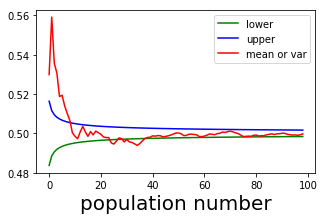

var


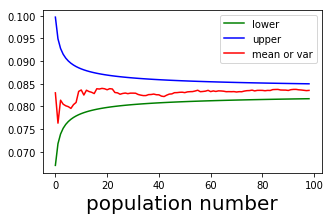

In [134]:
lower = []
upper = []
lower_var = []
upper_var = []
means_theory = []
vars_theory = []

for num in range(100,10000,100):
    data = list(mcg(alpha0, beta, M, num ,C))
    lower.append(uniform_mean - 1.96 * uniform_var / num ** 0.5)
    upper.append(uniform_mean + 1.96 * uniform_var / num ** 0.5)
    lower_var.append(uniform_var - 1.96 * uniform_var / num ** 0.5)
    upper_var.append(uniform_var + 1.96 * uniform_var / num ** 0.5)

    means_theory.append(np.mean(data))
    vars_theory.append(np.var(data))

print('mean')
draw_intervals(lower,upper,means_theory)
print('var')
draw_intervals(lower_var,upper_var,vars_theory)    

## Критерий пирсона 

In [138]:
from lab1.tests import pearson
from lab1.utils import format_test_result

MAX_K = k = 30
N = 500
M = 2.0 ** 31 -1
alpha0 = 111182930000999
beta = 16807.0
C = 29


data = gen_numbers_n = list(mcg(alpha0, beta, M, N ,C))
p = [1.0 / MAX_K] *MAX_K
gen_numbers_result = pearson(sorted(gen_numbers_n), p_list=p,k=MAX_K)

print('\npearson, chi:')
print('\tmcg:\t' + format_test_result(*gen_numbers_result))



pearson, chi:
	mcg:	k = 30 | 39.540 < 42.557 | test passed 


## Выводы
1. Для диаграммы рассеяния с размером выборки N = 150, 300, 500 заметны большие пустые участки и неоднородность их скопления, что говорит о неравномерности генерируемых СВ
2. Автокорреляция уже у выборки с N = 5000  хорошо приближается к нулю.
3. При N = 2500 МО начинает приближаться к теоретическому.
4. Дисперсия попадает в доверительный интервал для любого N.
5. Критерий Пирсона пройден для N = 300, 500, 1000, 5000, c следующими параметрами

    - MAX_K  = 30
    - M = 2.0 ** 31 -1
    - alpha0 = beta = 16807.0
    - C = 1, 29, 37
    
6. Поведение МО зависело от alpha0 и наилучший результат, когда МО приближалось к теоретическому начиная с N = 3000 при alpha0 = 567689

